In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df=pd.read_csv("../Notebooks/UNdata1.csv", nrows=6729) 

In [3]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2018  1734.723214              NaN
1        Afghanistan  2017  1758.465636              NaN
2        Afghanistan  2016  1757.023490              NaN
3        Afghanistan  2015  1766.593077              NaN
4        Afghanistan  2014  1795.735834              NaN
...              ...   ...          ...              ...
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN

[6729 rows x 4 columns]


In [4]:
gdp_df = gdp_df.drop(labels="Value Footnotes", axis=1)

In [5]:
#gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value":"GDP_Per_Capita"} )
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2018     1734.723214
1     Afghanistan  2017     1758.465636
2     Afghanistan  2016     1757.023490
3     Afghanistan  2015     1766.593077
4     Afghanistan  2014     1795.735834
...           ...   ...             ...
6724     Zimbabwe  1994     2768.309953
6725     Zimbabwe  1993     2572.870395
6726     Zimbabwe  1992     2591.007534
6727     Zimbabwe  1991     2906.272849
6728     Zimbabwe  1990     2819.549467

[6729 rows x 3 columns]


In [6]:
gdp_df = gdp_df.astype({"Country":"string"})

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   string 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB


In [8]:
gdp_df["Country"].nunique() #Number of Unique Countries

243

In [9]:
gdp_df["Country"].value_counts(ascending=True).head(20)

Djibouti                      1
Turks and Caicos Islands      8
South Sudan                   8
Sint Maarten (Dutch part)     9
Nauru                        12
Afghanistan                  17
SÃ£o TomÃ© and Principe      18
Other small states           19
Palau                        19
Small states                 19
Liberia                      19
CuraÃ§ao                     19
Qatar                        19
Timor-Leste                  19
Kosovo                       19
Cayman Islands               20
Libya                        20
Eritrea                      20
San Marino                   21
Montenegro                   22
Name: Country, dtype: Int64

Countries with less governance, changes in governance, newly founded, or general transparency

In [10]:
gdp_2014=(gdp_df[gdp_df["Year"]==2014])
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
4             Afghanistan  2014     1795.735834
21                Albania  2014    10700.993216
50                Algeria  2014    13557.769757
79                 Angola  2014     6813.052106
108   Antigua and Barbuda  2014    20440.540555
...                   ...   ...             ...
6592   West Bank and Gaza  2014     4445.307470
6617                World  2014    14514.392218
6646                Yemen  2014     3828.484887
6675               Zambia  2014     3684.685507
6704             Zimbabwe  2014     2506.490220

[240 rows x 3 columns]


In [11]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


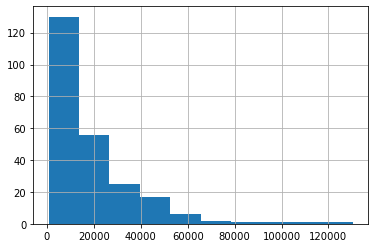

In [12]:
gdp_2014["GDP_Per_Capita"].hist()

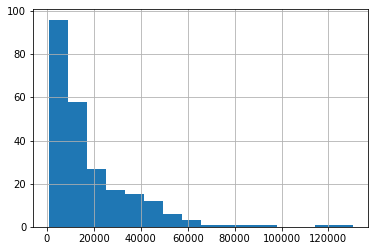

In [13]:
gdp_2014["GDP_Per_Capita"].hist(bins=16)

In [14]:
gdp_2014.sort_values("GDP_Per_Capita", ascending=False).head(5)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [15]:
gdp_2014.sort_values("GDP_Per_Capita").head(5)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


In [16]:
gdp_df.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = "Year")

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [17]:
#gdp_pivoted
#print(gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] ==2017)])

filteredGDP=gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] ==2017)]
filteredGDP.shape

(449, 3)

In [18]:
pivotGDP = filteredGDP.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = "Year")

In [19]:
pivotGDP = pivotGDP.dropna()
#filteredGDP.shape
#filteredGDP.isna()

In [20]:
print(pivotGDP)

Year                         1990          2017
Country                                        
Albania               4458.247115  11796.719185
Algeria              10300.015042  13822.389087
Angola                4761.229638   6044.972035
Antigua and Barbuda  17454.549799  22400.379562
Arab World           10491.507721  15542.746104
...                           ...           ...
Vietnam               1457.594613   6233.485045
World                 8966.014072  15527.280228
Yemen                 3425.707169   2404.422370
Zambia                2339.137959   3717.667166
Zimbabwe              2819.549467   2568.410072

[209 rows x 2 columns]


In [21]:
pivotGDP.isnull()

Year,1990,2017
Country,,
Albania,False,False
Algeria,False,False
Angola,False,False
Antigua and Barbuda,False,False
Arab World,False,False
...,...,...
Vietnam,False,False
World,False,False
Yemen,False,False


In [22]:
#Creates a column in the pivote table of GDP growth per capita from 1990 to 2017
pivotGDP['PercentChange'] = 100 * (pivotGDP[2017] - pivotGDP[1990]) / pivotGDP[1990]


#SCRAP CODE
#print(pivotGDP.head())
#pivotGDP.columns

In [23]:
#Number of countries with negative GDP growth from 1990 to 2017
print(str(pivotGDP[pivotGDP['PercentChange'] < 0]['PercentChange']
      .count()) + ' Countries have had negative per capita change in GDP from 1990 to 2017 and are liste below:')
print("\n")
      
#All countries with negative GDP growth from 1990 to 2017, sorted
print(pivotGDP[pivotGDP['PercentChange']<0].sort_values(by='PercentChange'))

20 Countries have had negative per capita change in GDP from 1990 to 2017 and are liste below:


Year                               1990          2017  PercentChange
Country                                                             
Dem. Rep. Congo             1386.933242    807.752905     -41.759785
United Arab Emirates      112349.597967  66477.818719     -40.829500
Burundi                     1027.396660    670.777072     -34.710993
Yemen                       3425.707169   2404.422370     -29.812379
Ukraine                    10463.959955   7906.540301     -24.440266
Central African Republic     982.659793    746.434942     -24.039332
Venezuela                  14619.454190  11489.648818     -21.408497
Tajikistan                  3661.340213   2923.673718     -20.147445
Haiti                       2061.842854   1653.001460     -19.828931
Gabon                      19556.665840  16144.935297     -17.445359
Madagascar                  1928.012284   1648.373871     -14.503975
Brunei

In [24]:
#DF combination of the two scrap code functions at the end of this cell
criteria_max_comb = pivotGDP.sort_values('PercentChange',ascending=False).iloc[0:2]
print(criteria_max_comb)
print("\n")
print("\n")


criteria_max1 = pivotGDP[pivotGDP['PercentChange'] == pivotGDP['PercentChange'].max()]
print(criteria_max1)
print("\n")
print("\n")


#DF selection of the country with the 2nd highest GDP per cap growth
criteria_max2 = criteria_max_comb.iloc[1:2]
print(criteria_max2)


#DIRECT ANSWER
#pivotGDP[pivotGDP['PercentChange'] == pivotGDP['PercentChange'].max()]

#SCRAP CODE - TESTED AND FAILED
#pivotGDP[pivotGDP['PercentChange'] == pivotGDP['PercentChange'].max()][['Country']]
#pivotGDP.loc[pivotGDP['PercentChange'] == pivotGDP['PercentChange'].max(), ['Country']] 

#SAMPLE TEMP CODE
#pivotGDP['PercentChange'].max()

#SCRAP CODE -- AD HOC 
#DF of sorted pivot table to ensure the top 2 GDP per cap countries can be selected through .iloc
#pivotGDP_sort = pivotGDP.sort_values('PercentChange', ascending=False)

#SCRAP CODE -- AD HOC
#DF contraining the top 2 GDP Growth Per Capita identified via the pivot table
#criteria_max2 = pivotGDP_sort.iloc[0:2]

Year                      1990          2017  PercentChange
Country                                                    
Equatorial Guinea  1017.764136  22298.942144    2090.973464
China              1521.963868  15253.993071     902.257241




Year                      1990          2017  PercentChange
Country                                                    
Equatorial Guinea  1017.764136  22298.942144    2090.973464




Year            1990          2017  PercentChange
Country                                          
China    1521.963868  15253.993071     902.257241


In [25]:
#Add indices to each of the criteria DFs created from the pivot table so they are compatible with the original DF
criteria_max_comb = criteria_max_comb.reset_index()
criteria_max1 = criteria_max1.reset_index()
criteria_max2 = criteria_max2.reset_index()

print(criteria_max1)
#print(gdp_df.head())

Year            Country         1990          2017  PercentChange
0     Equatorial Guinea  1017.764136  22298.942144    2090.973464


In [26]:
#TEMP CODE -- SHOULD WORK BUT DOES NOT CONVERT OBJECT TO STRING -- Something about the way Numpy stores string due an 8 bit limitation
#criteria_max1 = criteria_max1.to_string()

criteria_max1['Country'] = criteria_max1['Country'].astype(str)

#criteria_max1['Country'] = criteria_max1['Country'].apply(str)



criteria_max1.info()
print(criteria_max1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1 non-null      object 
 1   1990           1 non-null      float64
 2   2017           1 non-null      float64
 3   PercentChange  1 non-null      float64
dtypes: float64(3), object(1)
memory usage: 160.0+ bytes
Year            Country         1990          2017  PercentChange
0     Equatorial Guinea  1017.764136  22298.942144    2090.973464


In [28]:
#print(criteria_max1['Country'])

#gdp_df_top2 = gdp_df['Country'].isin([criteria_max2])              
#gdp_df[gdp_df_top2]

#print(gdp_df_top2)

#gdp_df[gdp_df_top2]


#TEMP CODE DID NOT WORK
#str(criteria_max1["Country"])

#SCRAP CODE USED FOR SYNTAX TESTING
#gdp_df_top2 = gdp_df['Country'].isin(['China'])

Year Country         1990          2017  PercentChange
0      China  1521.963868  15253.993071     902.257241


#1990 - 2017, EQ and China, 3 plots, gdp_df

gdp_df[
    gdp_df['Country']==criteria_max1['Country']].plot(
    x='Year',
    y='GDP_Per_Capita',
    kind='line',
    title='GDP Per Capita',
    label='Equatorial Guinea') #criteria_max1

#gdp_df.plot(x='Year', y='GDP_Per_Capita', kind='line', title="Equatorial Guinea")

gdp_df[gdp_df['Country']=='China'].plot(x='Year', y='GDP_Per_Capita', kind='line', title='China')

#gdp_df[gdp_df['Country'].plot(
#    x1=gdp_df[gdp_df['Country']=='China',gdp_df['Year']], 
 #   x2=gdp_df[['Country']=='Equatorial Guinea',gdp_df['Year']], 
  #  y1=gdp_df[['Country']=='China',gdp_df['GPD_Per_Capita']], 
   # y2=gdp_df[['Country']=='Equatorial Guinea',gdp_df['GPD_Per_Capita']], 
    #kind='line', 
    #title='GDP Per Capita', 
    #label1='Equatorial Guinea', 
    #label2='China')

gdp_df[gdp_df['Country']==[('Equatorial Guinea') | ('China')]].plot(
    x='Year',
    y='GDP_Per_Capita',
    kind='line', 
    title='GDP Per Capita', 
    label='Equatorial Guinea')

In [ ]:
#internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)
#internet_df = pd.read_csv('../data/internet_use.csv', warn_error_bad_lines=True)


In [ ]:
#groupby('continent')['country'].nunique()

gdp_df=gdp_df[["Country", "Year", "GDP_Per_Capita"]]  ######USE BRACES TO CALL COLUMN AND EQUALS TO RENAME IT
print(gdp_df)

git commit -m 'MESSAGE'
git push origin master
